In [1]:
# https://youtu.be/5x-CIHRmMNY
"""
@author: Sreenivas Bhattiprolu
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html
skimage.feature.greycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False)
distances - List of pixel pair distance offsets.
angles - List of pixel pair angles in radians.
skimage.feature.greycoprops(P, prop)
prop: The property of the GLCM to compute.
{‘contrast’, ‘dissimilarity’, ‘homogeneity’, ‘energy’, ‘correlation’, ‘ASM’}
"""

import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import io
import cv2
import numpy as np

(211, 270)


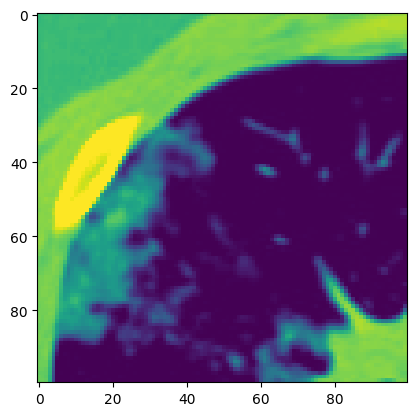

(100, 100)
<class 'numpy.ndarray'>
uint8


In [2]:
PATCH_SIZE = 35
imagePath = "Covid (20).png"
# image = io.imread(imagePath)
# plt.imshow(image, cmap='gray')
image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
print(image.shape)
image = image[0:100, 0:100]
# cv2.imshow('im', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(image)
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(image.shape)
print(type(image))
print(image.dtype) # prints the data type of the np.array object of type nd.array 


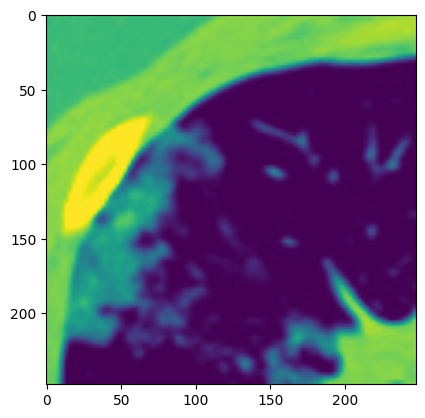

In [3]:
image = cv2.resize(image, (248, 248))
plt.imshow(image)
plt.show()

In [4]:
print(image.strides)

(248, 1)


In [5]:
 GLCM = graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
print(GLCM.shape)
plt.imshow(GLCM[50:60,100:110])
plt.show()


(256, 256, 1, 4)


TypeError: Invalid shape (10, 10, 1, 4) for image data

In [ ]:
matrix = np.random.randint(1, 8, (3, 3))
mat = matrix
print((mat))
# print(mat.dtype)
# print()
# glcm = graycomatrix(mat, [1], [0])
# print(glcm)
info = np.iinfo(mat.dtype) # Get the information of the incoming image type
data = mat.astype(np.float64) / info.max # normalize the data to 0 - 1
data = 255 * data # Now scale by 255
img = data.astype(np.uint8)
# cv2.imshow("Window", img)
plt.imshow(img)
plt.show()

In [ ]:
cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
print((cell_patches[0][34]))


In [ ]:
print(image[50:50 + 10, 50:50 + 10])
print(image[50:60, 50:60])

In [ ]:
#Full image
GLCM = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a= greycoprops(GLCM, 'energy')[0, 0]

# select some patches from grassy areas of the image
cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
scratch_locations = [(50, 200), (150, 200), (250, 150), (200, 200)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])


# OPTIONAL PLOTTING for Visualization of points and patches
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()